In [ ]:
!unzip "/content/drive/MyDrive/train.zip" -d "/content/drive/My Drive/"

In [ ]:
import numpy as np
import pandas as pd
import os
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import random
from keras.callbacks import ModelCheckpoint

In [ ]:
data_dir = '/content/drive/MyDrive/train'
CATEGORIES = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T',
              'U','V','W','X','Y','SPACE','DEL','NOTHING']

A | B | C | D | E | F | G | H | I | K | L | M | N | O | P | Q | R | S | T | U | V | W | X | Y | SPACE | DEL | NOTHING | unique_labels =  ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'SPACE', 'DEL', 'NOTHING']


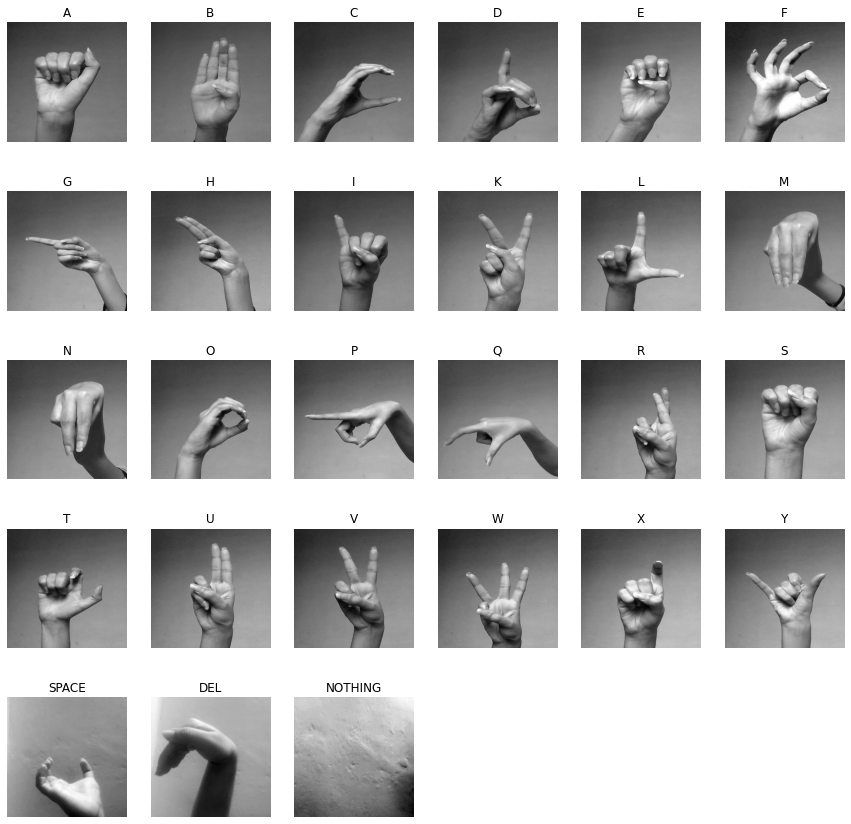

In [ ]:
def load_unique(DIR):
    images_for_plot = []
    labels_for_plot = []
    size_img = 300,300
    for category in CATEGORIES:
        path = os.path.join(DIR,category)
        class_num = category
        print(category, end = ' | ')
        for img in os.listdir(path):
            image = cv2.imread(os.path.join(path,img))
            final_img = cv2.resize(image, size_img)
            final_img = cv2.cvtColor(final_img, cv2.COLOR_BGR2GRAY)
            images_for_plot.append(final_img)
            labels_for_plot.append(class_num)
            break
    return images_for_plot, labels_for_plot

images_for_plot, labels_for_plot = load_unique(data_dir)
print("unique_labels = ", labels_for_plot)

fig = plt.figure(figsize = (15,15))
def plot_images(fig, image, label, row, col, index):
    fig.add_subplot(row, col, index)
    plt.axis('off')
    plt.imshow(image, cmap = 'gray')
    plt.title(label)
    return

image_index = 0
row = 5
col = 6
for i in range(1,(row*col)):
    if i > 27 :
      break
    plot_images(fig, images_for_plot[image_index], labels_for_plot[image_index], row, col, i)
    image_index = image_index + 1
plt.show()

In [ ]:
def load_data_train(DIR):
    train_data = []
    size = 64,64
    print("LOADING DATA FROM : ",end = "")
    for category in CATEGORIES:
        path = os.path.join(DIR,category)
        class_num=CATEGORIES.index(category)
        print(category, end = ' | ')
        for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path,img))
            try:
                new_array = cv2.resize(img_array,size)
                final_img = cv2.cvtColor(new_array, cv2.COLOR_BGR2GRAY)
                train_data.append([final_img,class_num])
            except:
                print(os.path.join(path,img))
    random.shuffle(train_data)
    X=[]
    Y=[]
    for features, label in train_data:
        X.append(features)
        Y.append(label)
    X = np.array(X).reshape(-1,64,64,1)
    Y = np.array(Y)
    X = X.astype('float32')/255.0
    
    Y = keras.utils.to_categorical(Y,27)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
    
    print()
    print('Loaded', len(X_train),'images for training,','Train data shape =',X_train.shape)
    print('Loaded', len(X_test),'images for testing','Test data shape =',X_test.shape)
    
    return X_train, X_test, Y_train, Y_test

In [ ]:
def create_model():
    model = Sequential()
    model.add(Conv2D(16, kernel_size = [3,3], padding = 'same', activation = 'relu', input_shape = (64,64,1)))
    model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(64, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(Conv2D(64, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(128, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(256, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(Conv2D(256, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(512, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(1024, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(1024, activation = 'relu'))
    model.add(Dense(27, activation = 'softmax'))
    opt = keras.optimizers.Adam(learning_rate=0.000001)
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ["accuracy"])
    print("MODEL CREATED")
    model.summary()
    return model

def fit_model():
    checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
    model_hist = model.fit(X_train, Y_train, batch_size = 50, epochs = 20,
          validation_split = 0.2, callbacks = [checkpointer], 
          verbose=1, shuffle=True)
    return model_hist 

In [ ]:
X_train, X_test, Y_train, Y_test = load_data_train(data_dir)

LOADING DATA FROM : A | B | C | D | E | F | G | H | I | K | /content/drive/MyDrive/train/K/1441.jpg
L | M | N | O | P | Q | R | S | T | U | V | W | X | Y | SPACE | DEL | NOTHING | 
Loaded 29462 images for training, Train data shape = (29462, 64, 64, 1)
Loaded 7366 images for testing Test data shape = (7366, 64, 64, 1)


In [ ]:
model = create_model()
model_hist = fit_model()

MODEL CREATED
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 64, 64, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)

In [ ]:
model.load_weights('model.weights.best.hdf5')

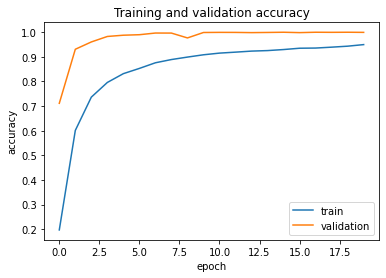

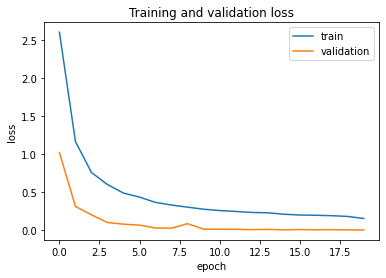

In [ ]:
plt.plot(model_hist.history['accuracy'])
plt.plot(model_hist.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

plt.plot(model_hist.history['loss'])
plt.plot(model_hist.history['val_loss'])
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
# testgen=ImageDataGenerator(rescale=1/255.0)
# testdata_generator = testgen.flow(X_test,Y_test)
# loss,accuracy = model.evaluate(testdata_generator)
# print("test accuracy: "+ str(accuracy*100))
evaluate_metrics = model.evaluate(X_test, Y_test)
print("\nEvaluation Accuracy = ", "{:.2f}%".format(evaluate_metrics[1]*100),"\nEvaluation loss = " ,"{:.6f}".format(evaluate_metrics[0]))

231/231 [==============================] - 1s 4ms/step - loss: 0.0063 - accuracy: 0.9986

Evaluation Accuracy =  99.86% 
Evaluation loss =  0.006253
